In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

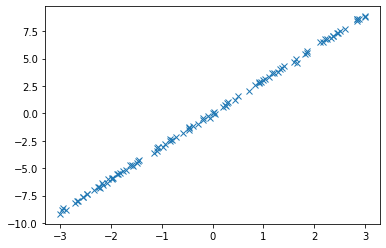

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1549.3034461267878
Step: 50, Mini batch elbo: -633.1201094292351
Step: 100, Mini batch elbo: -230.43243779875073
Step: 150, Mini batch elbo: -169.83133555811625
Step: 200, Mini batch elbo: -157.48934287056804
Step: 250, Mini batch elbo: -152.98602791783716
Step: 300, Mini batch elbo: -151.36866136496133
Step: 350, Mini batch elbo: -147.6583247819272
Step: 400, Mini batch elbo: -144.99061984220756
Step: 450, Mini batch elbo: -143.93694306332998
Step: 500, Mini batch elbo: -139.94776311812342
Step: 550, Mini batch elbo: -137.1046856265445
Step: 600, Mini batch elbo: -134.10815623861086
Step: 650, Mini batch elbo: -131.0819204694825
Step: 700, Mini batch elbo: -127.56610396785337
Step: 750, Mini batch elbo: -123.72881276976022
Step: 800, Mini batch elbo: -119.74053480814595
Step: 850, Mini batch elbo: -115.55934559060117
Step: 900, Mini batch elbo: -110.94374266876838
Step: 950, Mini batch elbo: -106.25455291713739
Step: 1000, Mini batch elbo: -100.5910513114198

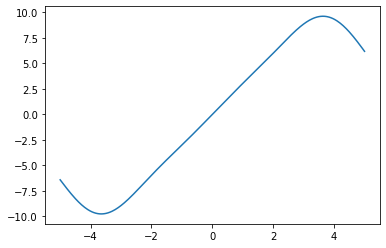

In [4]:
pmu, pvar = model.predict_f(pX)

plt.plot(pX, pmu)

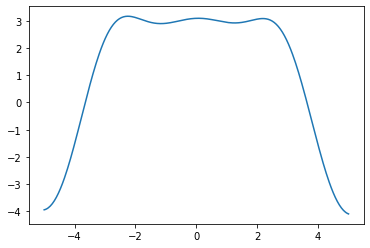

In [5]:
dmu, dvar = model.predict_df(pX)

plt.plot(pX, dmu[:,-1])

## Higher-dimensional input

In [6]:
pX = np.reshape(np.random.uniform(-2, 2, 200*2), [200, 2])
X = np.random.uniform(-3, 3, 200*2)[:, None]
X = np.reshape(X, [200, 2])
Y = 2 * X[:,0] + 1 * X[:,1] + np.random.randn(200) * 0.1
Y = np.reshape(Y, [200,1])
Z = np.random.uniform(-3, 3, 100*2)[:, None]
Z = np.reshape(Z, [100, 2])

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

print(Y.shape)
#plt.plot(X,Y ,"x")

(200, 1)


We again define a model with a SqauredExponential kernel

In [7]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(3000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1611.3437977374372
Step: 50, Mini batch elbo: -741.3128895946351
Step: 100, Mini batch elbo: -392.10929848783974
Step: 150, Mini batch elbo: -339.0781536501703
Step: 200, Mini batch elbo: -317.06342658951644
Step: 250, Mini batch elbo: -301.44857901825435
Step: 300, Mini batch elbo: -288.18348301364284
Step: 350, Mini batch elbo: -275.4809720734019
Step: 400, Mini batch elbo: -262.951077753021
Step: 450, Mini batch elbo: -251.23720060845096
Step: 500, Mini batch elbo: -236.78272055583233
Step: 550, Mini batch elbo: -222.23759687489138
Step: 600, Mini batch elbo: -206.56231186919942
Step: 650, Mini batch elbo: -189.17696517198937
Step: 700, Mini batch elbo: -170.29754895322355
Step: 750, Mini batch elbo: -149.5559994678656
Step: 800, Mini batch elbo: -126.80072403819332
Step: 850, Mini batch elbo: -103.92748514439883
Step: 900, Mini batch elbo: -77.3960392363552
Step: 950, Mini batch elbo: -49.84297691030173
Step: 1000, Mini batch elbo: -23.162781747325553
Ste

<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[1.98720154, 0.71085173]])>

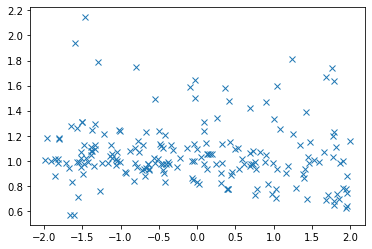

In [14]:
dmu, dvar = model.predict_df(pX)
plt.plot(pX[:,1], dmu[:,:,1], "x")
dmu[2,:,:]

In [9]:
kernel.lengthscales

<Parameter: dtype=float64, shape=[], fn="softplus", numpy=4.107532846090893>